[View in Colaboratory](https://colab.research.google.com/github/avault/chicago_public_schools/blob/master/analysis_setup.ipynb)

# Setup

In [63]:
# Module Imports

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import analysis_helper

In [2]:
# Make sure we can see all the data
pd.set_option('display.max_rows', None)  

In [3]:
# Load Data
profile_df = pd.read_csv( '../data/Chicago_Public_Schools_-_School_Profile_Information_SY1617.csv' )
progress_df = pd.read_csv( '../data/Chicago_Public_Schools_-_School_Progress_Reports_SY1617.csv' )

In [4]:
profile_df.set_index( 'School_ID', inplace=True )
progress_df.set_index( 'School_ID', inplace=True )

In [5]:
print( '{} school profiles'.format( len( profile_df ) ) )
print( '{} school progress reports'.format( len( progress_df ) ) )

661 school profiles
661 school progress reports


In [6]:
# Combine into one df
combined_df = pd.concat( [profile_df, progress_df ], axis=1 )
combined_df = combined_df.loc[:,~combined_df.columns.duplicated()]

In [7]:
# Choose high schools
is_hs = profile_df['Is_High_School'] == 'Y'
hs_df = combined_df.loc[is_hs]

In [8]:
# Allow plotting all columns, and then show them.
for column in hs_df.columns:
    print( column )

Legacy_Unit_ID
Finance_ID
Short_Name
Long_Name
School_Type
Primary_Category
Is_High_School
Is_Middle_School
Is_Elementary_School
Is_Pre_School
Summary
Administrator_Title
Administrator
Secondary_Contact_Title
Secondary_Contact
Address
City
State
Zip
Phone
Fax
CPS_School_Profile
Website
Facebook
Twitter
Youtube
Pinterest
Attendance_Boundaries
Grades_Offered_All
Grades_Offered
Student_Count_Total
Student_Count_Low_Income
Student_Count_Special_Ed
Student_Count_English_Learners
Student_Count_Black
Student_Count_Hispanic
Student_Count_White
Student_Count_Asian
Student_Count_Native_American
Student_Count_Other_Ethnicity
Student_Count_Asian_Pacific_Islander
Student_Count_Multi
Student_Count_Hawaiian_Pacific_Islander
Student_Count_Ethnicity_Not_Available
Statistics_Description
Demographic_Description
ADA_Accessible
Dress_Code
PreK_School_Day
Kindergarten_School_Day
School_Hours
Freshman_Start_End_Time
After_School_Hours
Earliest_Drop_Off_Time
Classroom_Languages
Bilingual_Services
Refugee_Serv

### Some Plotting Functions

In [9]:
def histogram_plot( df, column ):

    fig = plt.figure( figsize=(12,8), facecolor='white' )
    ax = plt.gca()

    ax.hist(
      np.ma.fix_invalid( df[column] ).compressed()
    )

    ax.set_xlabel( column, fontsize=22 )

    plt.xticks( fontsize=20 )

In [10]:
def scatter_plot( df, x_key, y_key ):
  
    fig = plt.figure( figsize=(12,11), facecolor='white' )
    ax = plt.gca()

    ax.scatter(
      df[x_key],
      df[y_key]
    )

    ax.set_xlabel( x_key, fontsize=22 )
    ax.set_ylabel( y_key, fontsize=22 )

    plt.xticks( fontsize=20 )
    plt.yticks( fontsize=20 )

# Analysis

## The Largest High School

In [11]:
largest_school = hs_df.loc[hs_df['Student_Count_Total'].idxmax()]
largest_school

Legacy_Unit_ID                                                                              1440
Finance_ID                                                                                 46221
Short_Name                                                                          LANE TECH HS
Long_Name                                                    Albert G Lane Technical High School
School_Type                                                                 Selective enrollment
Primary_Category                                                                              HS
Is_High_School                                                                                 Y
Is_Middle_School                                                                               Y
Is_Elementary_School                                                                           N
Is_Pre_School                                                                                  N
Summary                       

Lane Tech is the largest school in the CPS system, and receives high marks.

## How Does School Size Correlate with Performance?

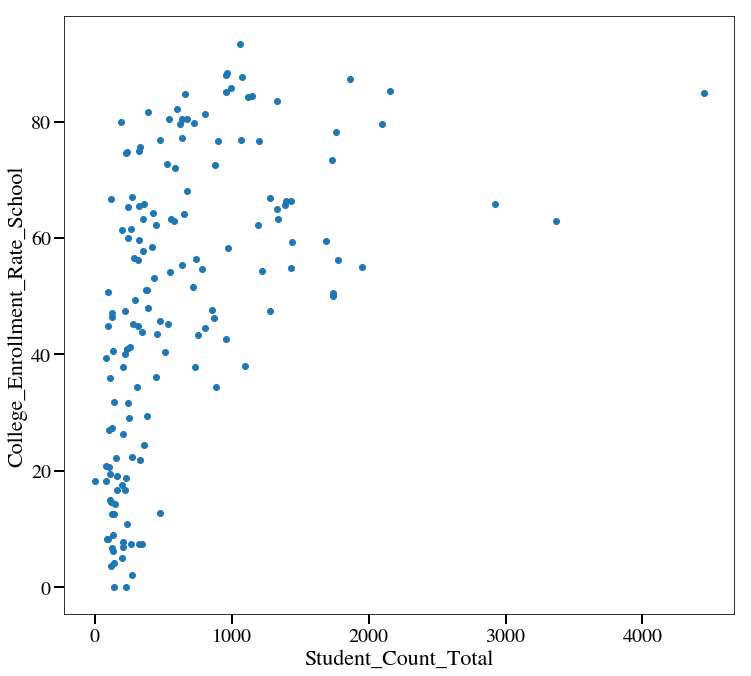

In [12]:
scatter_plot( hs_df, 'Student_Count_Total', 'College_Enrollment_Rate_School' )

## How Does the Fraction of Low Income Students Correlate with Performance?

(0, 100)

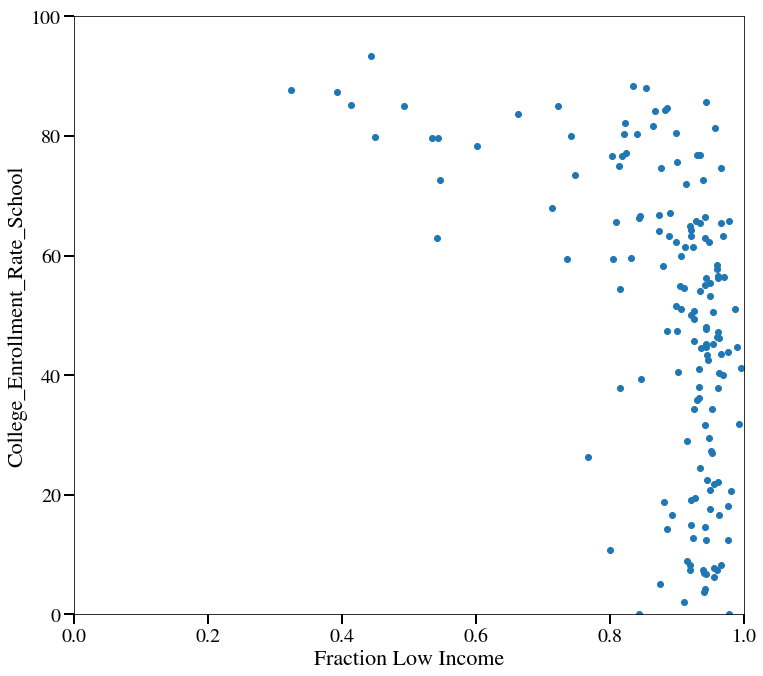

In [13]:
fig = plt.figure( figsize=(12,11), facecolor='white' )
ax = plt.gca()

ax.scatter(
  hs_df['Student_Count_Low_Income'] / hs_df['Student_Count_Total'],
  hs_df['College_Enrollment_Rate_School']
)

ax.set_xlabel( 'Fraction Low Income', fontsize=22 )
ax.set_ylabel( 'College_Enrollment_Rate_School', fontsize=22 )

plt.xticks( fontsize=20 )
plt.yticks( fontsize=20 )

ax.set_xlim(0, 1)
ax.set_ylim(0, 100)

The schools with low college enrollment are **exclusively** schools where more than 70% of students come from a low-income family.

(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 <a list of 10 Text yticklabel objects>)

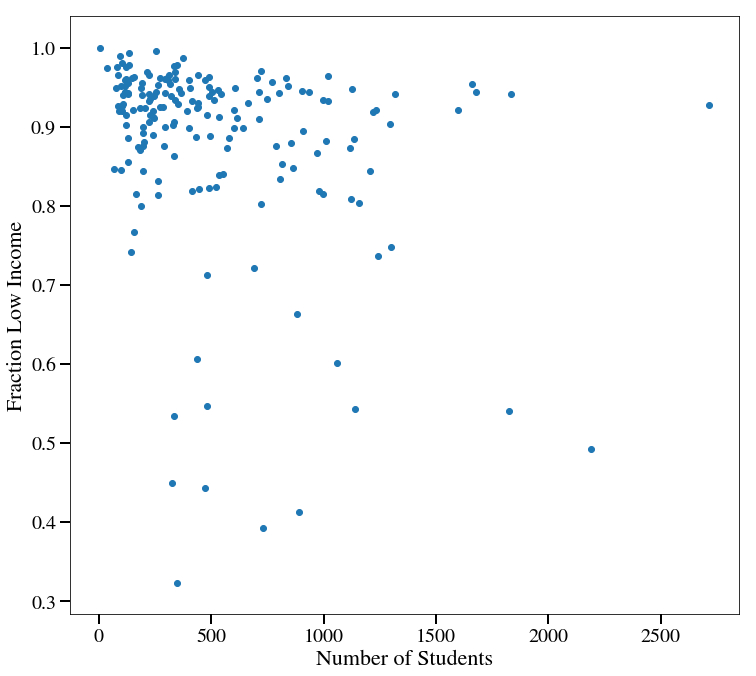

In [14]:
fig = plt.figure( figsize=(12,11), facecolor='white' )
ax = plt.gca()

ax.scatter(
  hs_df['Student_Count_Low_Income'],
  hs_df['Student_Count_Low_Income'] / hs_df['Student_Count_Total'],
)

ax.set_xlabel( 'Number of Students', fontsize=22 )
ax.set_ylabel( 'Fraction Low Income', fontsize=22 )

plt.xticks( fontsize=20 )
plt.yticks( fontsize=20 )

The schools with the highest fraction of low-income students are also those with the fewest students.

## How Does CPS Rating Track Other Performance Metrics?

In [15]:
overall_rating_mapping = {
    'Inability to Rate': 0,
    'Level 3': 1.,
    'Level 3+': 1.5,
    'Level 2': 2.,
    'Level 2+': 2.5,
    'Level 1': 3.,
    'Level 1+': 3.5,
}
overall_rating_int = []
for rating in hs_df['Overall_Rating']:
    overall_rating_int.append( overall_rating_mapping[rating] )
hs_df['Overall_Rating_Int'] = np.array( overall_rating_int )

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


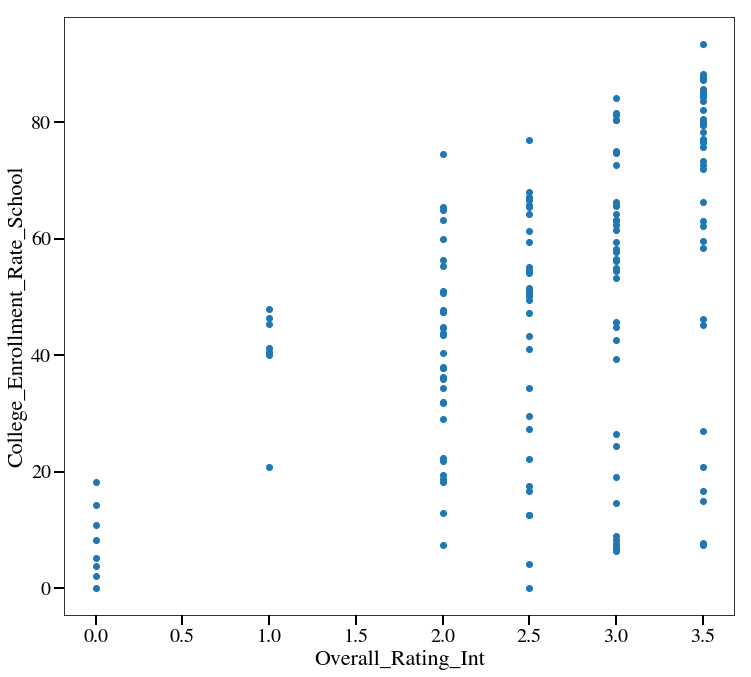

In [16]:
scatter_plot( hs_df, 'Overall_Rating_Int', 'College_Enrollment_Rate_School' )

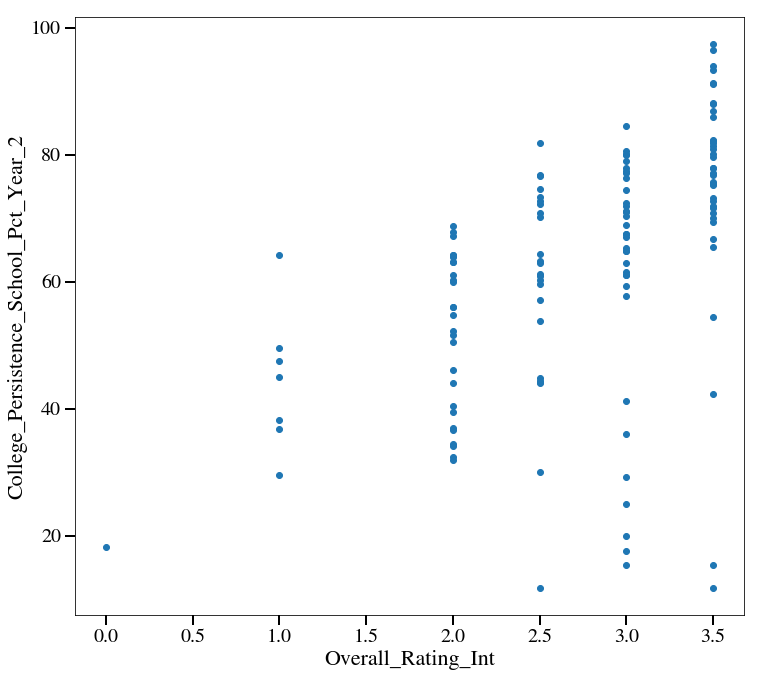

In [17]:
scatter_plot( hs_df, 'Overall_Rating_Int', 'College_Persistence_School_Pct_Year_2' )

### Why are there schools that get a very good rating, but don't enroll many students in college?

In [18]:
# Select these schools
high_rating = hs_df['Overall_Rating_Int'] >= 3.0
low_enrollment = hs_df['College_Enrollment_Rate_School'] <= 30.
high_rating_and_low_enrollment = high_rating & low_enrollment
hr_le_df = hs_df.loc[high_rating_and_low_enrollment]
hr_le_df

,Legacy_Unit_ID,Finance_ID,Short_Name,Long_Name,School_Type,Primary_Category,Is_High_School,Is_Middle_School,Is_Elementary_School,Is_Pre_School,...,Progress_Toward_Graduation_Year_2,State_School_Report_Card_URL,Mobility_Rate_Pct,Chronic_Truancy_Pct,Empty_Progress_Report_Message,School_Survey_Rating_Description,Supportive_School_Award,Supportive_School_Award_Desc,Parent_Survey_Results_Year,Overall_Rating_Int
School_ID,,,,,,,,,,,,,,,,,,,,,
400123,9040,66106,YCCS - SCHOLASTIC ACHIEVEMENT,YCCS- Academy of Scholastic Achievement HS,Charter,HS,Y,N,N,N,...,2016.0,http://iirc.niu.edu/School.aspx?schoolid=15016...,NaN,NaN,A School Progress Report customized for CPS Op...,This school is “Organized for Improvement” whi...,Coming Soon,This school is in the process of being reviewe...,2016.0,3.0
400126,9043,66109,YCCS - ASSOCIATION HOUSE,YCCS-Association House HS,Charter,HS,Y,N,N,N,...,2016.0,http://iirc.niu.edu/School.aspx?schoolid=15016...,NaN,NaN,A School Progress Report customized for CPS Op...,This school is “Partially Organized for Improv...,Coming Soon,This school is in the process of being reviewe...,2016.0,3.0
400127,9044,66611,YCCS - AUSTIN CAREER,YCCS-Austin Career Education Center HS,Charter,HS,Y,N,N,N,...,2016.0,http://iirc.niu.edu/School.aspx?schoolid=15016...,NaN,NaN,A School Progress Report customized for CPS Op...,This school is “Organized for Improvement” whi...,Coming Soon,This school is in the process of being reviewe...,2016.0,3.5
400128,9045,66612,YCCS - CCA ACADEMY,YCCS-CCA Academy HS,Charter,HS,Y,N,N,N,...,2016.0,http://iirc.niu.edu/School.aspx?schoolid=15016...,NaN,NaN,A School Progress Report customized for CPS Op...,This school is “Moderately Organized for Impro...,Coming Soon,This school is in the process of being reviewe...,2016.0,3.0
400130,9047,66614,YCCS - YOUTH DEVELOPMENT,YCCS-Community Youth Development Institute HS,Charter,HS,Y,N,N,N,...,2016.0,http://iirc.niu.edu/School.aspx?schoolid=15016...,NaN,NaN,A School Progress Report customized for CPS Op...,This school is “Organized for Improvement” whi...,Coming Soon,This school is in the process of being reviewe...,2016.0,3.0
400131,9601,66615,YCCS - CAMPOS,YCCS-Dr. Pedro Albizu Campos Puerto Rican HS,Charter,HS,Y,N,N,N,...,2016.0,http://iirc.niu.edu/School.aspx?schoolid=15016...,NaN,NaN,A School Progress Report customized for CPS Op...,This school is “Organized for Improvement” whi...,Coming Soon,This school is in the process of being reviewe...,2016.0,3.0
400133,9602,66617,YCCS - INNOVATIONS,YCCS- Innovations HS of Arts Integration,Charter,HS,Y,N,N,N,...,2016.0,http://iirc.niu.edu/School.aspx?schoolid=15016...,NaN,NaN,A School Progress Report customized for CPS Op...,This school is “Organized for Improvement” whi...,Coming Soon,This school is in the process of being reviewe...,2016.0,3.0
400134,9051,66618,YCCS - ADDAMS,YCCS-Jane Addams Alternative HS,Charter,HS,Y,N,N,N,...,2016.0,http://iirc.niu.edu/School.aspx?schoolid=15016...,NaN,NaN,A School Progress Report customized for CPS Op...,This school is “Well-Organized for Improvement...,Coming Soon,This school is in the process of being reviewe...,2016.0,3.5
400135,9052,66619,YCCS - LATINO YOUTH,YCCS-Latino Youth Alternative HS,Charter,HS,Y,N,N,N,...,2016.0,http://iirc.niu.edu/School.aspx?schoolid=15016...,NaN,NaN,A School Progress Report customized for CPS Op...,This school is “Moderately Organized for Impro...,Coming Soon,This school is in the process of being reviewe...,2016.0,3.0


(0, 100)

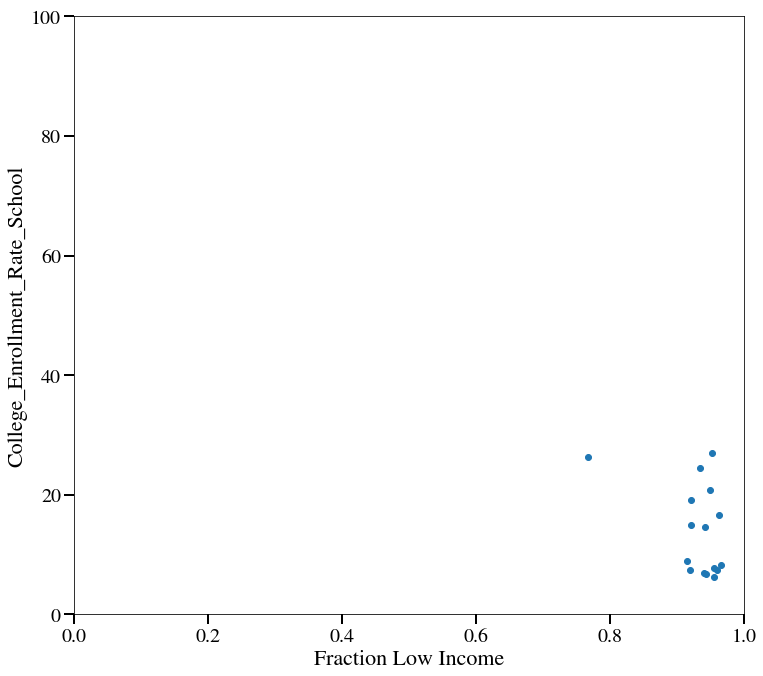

In [19]:
fig = plt.figure( figsize=(12,11), facecolor='white' )
ax = plt.gca()

ax.scatter(
  hr_le_df['Student_Count_Low_Income'] / hr_le_df['Student_Count_Total'],
  hr_le_df['College_Enrollment_Rate_School']
)

ax.set_xlabel( 'Fraction Low Income', fontsize=22 )
ax.set_ylabel( 'College_Enrollment_Rate_School', fontsize=22 )

plt.xticks( fontsize=20 )
plt.yticks( fontsize=20 )

ax.set_xlim(0, 1)
ax.set_ylim(0, 100)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text xticklabel objects>)

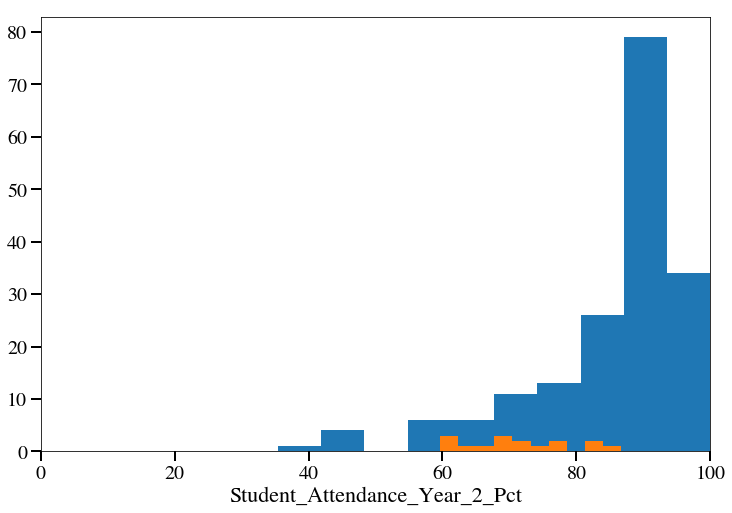

In [20]:
fig = plt.figure( figsize=(12,8), facecolor='white' )
ax = plt.gca()

column = 'Student_Attendance_Year_2_Pct'

ax.hist(
  np.ma.fix_invalid( hs_df[column] ).compressed()
)
ax.hist(
  np.ma.fix_invalid( hr_le_df[column] ).compressed()
)

ax.set_xlabel( column, fontsize=22 )

ax.set_xlim( 0, 100 )

plt.xticks( fontsize=20 )

It doesn't seem to be student attendance... Unless we need to compare to similar schools.

The answer must lie in digging into how the ratings are calculated. CPS has that online [here](http://cps.edu/sqrp).

# How Does Attendance Correlate?

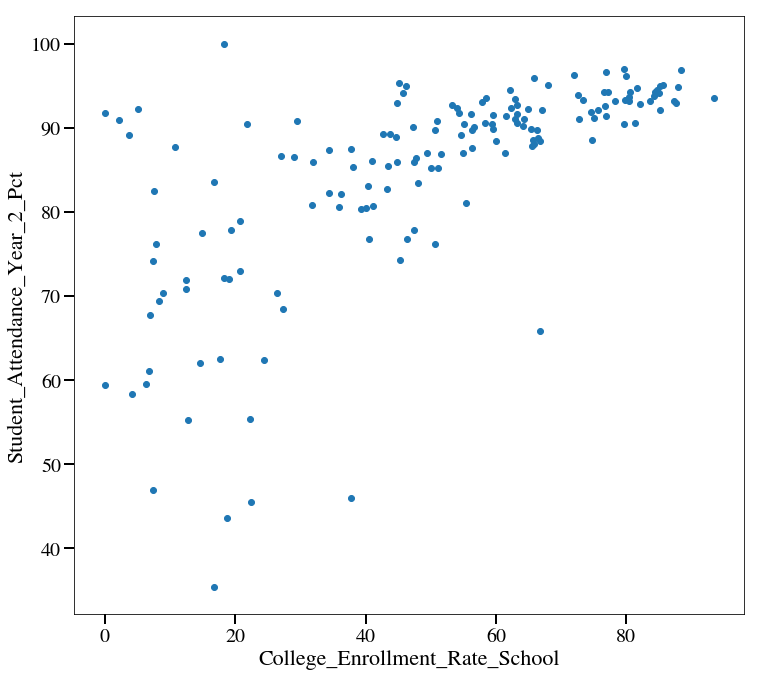

In [21]:
scatter_plot( hs_df, 'College_Enrollment_Rate_School', 'Student_Attendance_Year_2_Pct',  )

In [22]:
hs_df.to_csv( '../data/Chicago_Public_High_Schools_-_School_Progress_Reports_SY1617.csv')

In [23]:
hs_df.columns

Index(['Legacy_Unit_ID', 'Finance_ID', 'Short_Name', 'Long_Name',
       'School_Type', 'Primary_Category', 'Is_High_School', 'Is_Middle_School',
       'Is_Elementary_School', 'Is_Pre_School',
       ...
       'Progress_Toward_Graduation_Year_2', 'State_School_Report_Card_URL',
       'Mobility_Rate_Pct', 'Chronic_Truancy_Pct',
       'Empty_Progress_Report_Message', 'School_Survey_Rating_Description',
       'Supportive_School_Award', 'Supportive_School_Award_Desc',
       'Parent_Survey_Results_Year', 'Overall_Rating_Int'],
      dtype='object', length=236)

In [24]:
import math


def distance(origin, destination, convert_to_miles=True ):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    if convert_to_miles:
        d *= 0.621371

    return d

In [27]:
d = distance(
    ( hs_df.loc[400010]['School_Latitude'], hs_df.loc[400010]['School_Longitude'] ),
    ( hs_df.loc[400013]['School_Latitude'], hs_df.loc[400013]['School_Longitude'] ),
)

# Ranking

In [30]:
n_df = hs_df.loc[hs_df['School_Type'] == 'Neighborhood']

In [42]:
def ranking_algorithm( df, column_variables ):
    
    for column, variables in column_variables.items():
        try:
            column_values += variables['weight'] * df[column] / variables['scaling']
        except UnboundLocalError:
            column_values = variables['weight'] * df[column] / variables['scaling']
            
    return column_values

In [43]:
column_variables = {
    'Graduation_Rate_School': { 'weight': 2., 'scaling': 100. },
    'Student_Attendance_Avg_Pct': { 'weight': 1.5, 'scaling': 100. },
    'College_Enrollment_Rate_School': { 'weight': 1.5, 'scaling': 90. },
}

In [44]:
n_df['nuacps_rating'] = ranking_algorithm( n_df, column_variables )

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(array([2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75]),
 <a list of 10 Text xticklabel objects>)

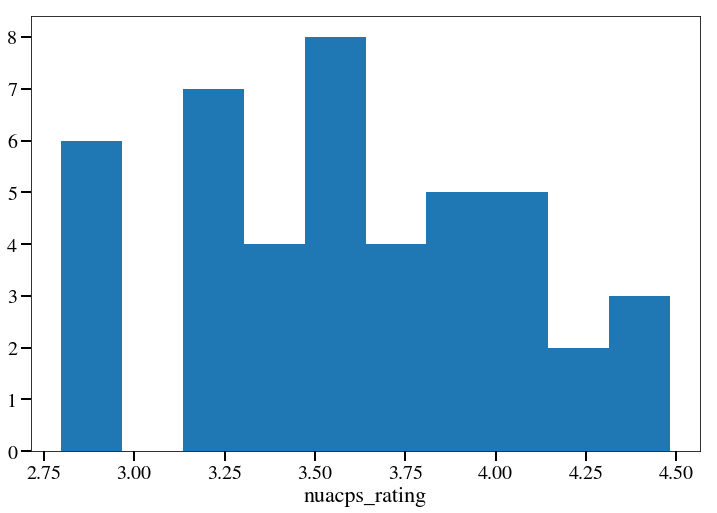

In [51]:
fig = plt.figure( figsize=(12,8), facecolor='white' )
ax = plt.gca()

column = 'nuacps_rating'

ax.hist(
    np.ma.fix_invalid( n_df[column] ).compressed(),
    bins = 10,
)

ax.set_xlabel( column, fontsize=22 )

# ax.set_xlim( 0, 100 )

plt.xticks( fontsize=20 )

In [56]:
n_df = n_df.sort_values('nuacps_rating', ascending=False )

In [73]:
n_df['Long_Name'].values

array(['Lincoln Park High School', 'Kenwood Academy High School',
       'Lake View High School', 'Ogden International High School',
       'William Howard Taft High School', 'Morgan Park High School',
       'Eric Solorio Academy High School', 'Nicholas Senn High School',
       'Spry Community Links High School', 'Gurdon S Hubbard High School',
       'Roald Amundsen High School', 'Stephen T Mather High School',
       'Thomas Kelly High School',
       'Benito Juarez Community Academy High School',
       'William J Bogan High School',
       'Roberto Clemente Community Academy High School',
       'John F Kennedy High School', 'George Washington High School',
       'Carl Schurz High School',
       'Ellen H Richards Career Academy High School',
       'Charles P Steinmetz College Preparatory HS',
       'North-Grand High School', 'Hope College Preparatory High School',
       'Percy L Julian High School', 'Roger C Sullivan High School',
       'Wells Community Academy High School'

In [71]:
n_df[['Long_Name', 'nuacps_rating', 'Overall_Rating_Int']]

,Long_Name,nuacps_rating,Overall_Rating_Int
School_ID,,,
609738,Lincoln Park High School,4.481667,3.5
609746,Kenwood Academy High School,4.398000,3.5
609719,Lake View High School,4.320000,3.0
610529,Ogden International High School,4.283000,3.0
609734,William Howard Taft High School,4.155000,3.0
609725,Morgan Park High School,4.106333,2.5
610543,Eric Solorio Academy High School,4.047667,3.5
609730,Nicholas Senn High School,4.017000,3.0
610357,Spry Community Links High School,4.011667,2.5


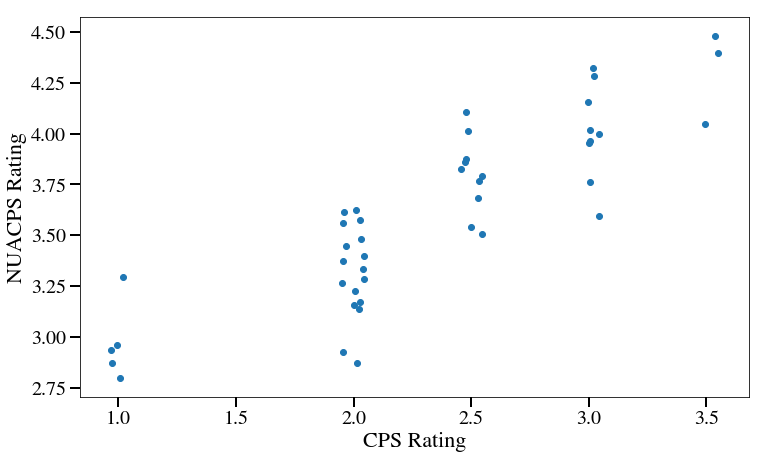

In [67]:
analysis_helper.scatter_plot( 
    n_df, 
    'Overall_Rating_Int', 
    'nuacps_rating', 
    x_label='CPS Rating',
    y_label='NUACPS Rating',
    jitter = 0.05,
)